#### Import the required libraries needed for the assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL

In [ ]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

### Task 1

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Task 2

In [10]:
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


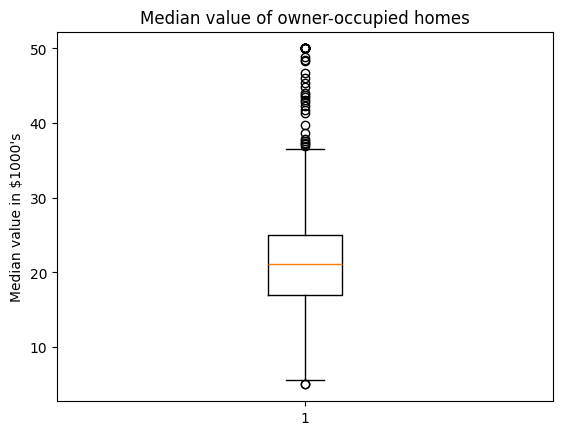

In [11]:
plt.title('Median value of owner-occupied homes')
plt.boxplot(df['MEDV'])
plt.ylabel("Median value in $1000's")
plt.show()

The boxplot shows the the median value of the homes is around 20,000 USD and range between 5,000 USD and 37,000 USD. Additionally, there are significant outliers towards the higher values.

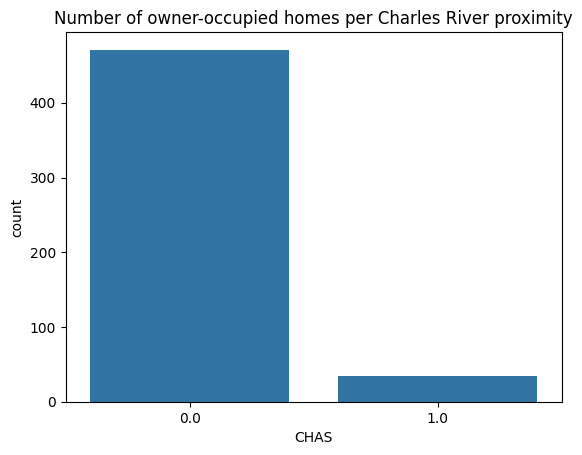

In [ ]:
sns.countplot(x='CHAS', data=df)
plt.title('Number of owner-occupied homes per Charles River proximity')

plt.show()

The bar chart shows that the sub-class of homes bounded by the Charles River is much smaller than the class of unbounded homes. This means the dataset is heavily imbalanced with regards to this feature.

In [15]:
cutoffs = [35, 70]
df['AGE_GR'] = np.digitize(df['AGE'], bins=cutoffs)

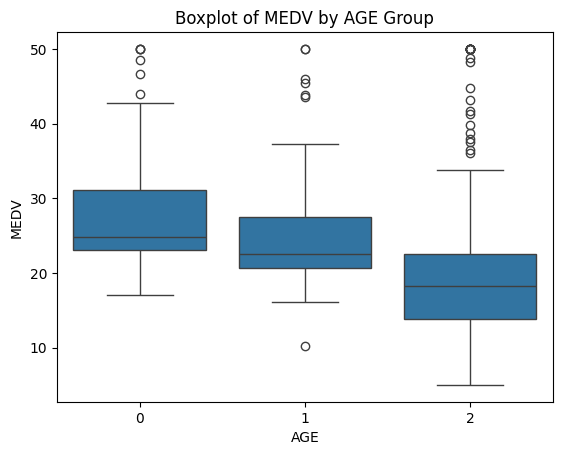

In [16]:
sns.boxplot(x='AGE_GR', y='MEDV', data=df)

plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('AGE')
plt.ylabel('MEDV')

plt.show()

The boxplot of median value by age group shows that there is an inverse relationship between the age and the value of a home. Intuitively, older houses have a lower value. However, we also see an increase in outliers for the oldest age gruop, which probably indicates some old homes that were fixed up to a high standard.

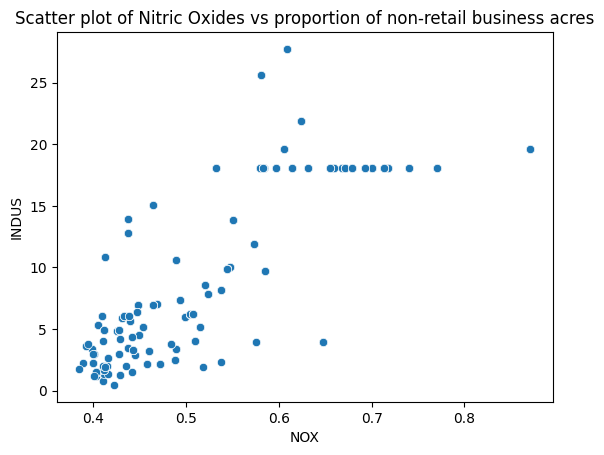

In [39]:
sns.scatterplot(x='NOX', y='INDUS', data=df)

plt.title('Scatter plot of Nitric Oxides vs proportion of non-retail business acres')
plt.xlabel('NOX')
plt.ylabel('INDUS')

plt.show()

The scatter plot shows a positive rellationship between nitric oxide concentration and the amount of non-retail per acre per town. This again is an intuitive relationship, as the increase of industry in an area will increase the amount of pollution in the air.

In [18]:
df['PTRATIO'].head(5)

0    15.3
1    17.8
2    17.8
3    18.7
4    18.7
Name: PTRATIO, dtype: float64

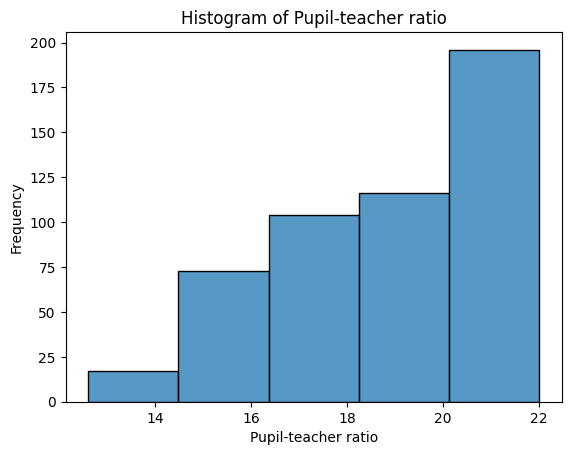

In [19]:
sns.histplot(df['PTRATIO'], bins=5)

plt.title('Histogram of Pupil-teacher ratio')
plt.xlabel('Pupil-teacher ratio')
plt.ylabel('Frequency')

plt.show()

The histogram shows a skewed distribution of the pupil to teacher ratio. When increasing the bins to 10 there also seems to be a slight case of bi-modality with peaks at the ower and higher end of the spectrum.

### Task 3

Hypothesis: H0 - There is no difference in the median value of houses bounded by the Charles river.  
alpha = 0.05

In [21]:
alpha = 0.05

t_statistic, p_value = stats.ttest_ind(df.loc[df['CHAS'] == 1, 'MEDV'], df.loc[df['CHAS'] == 0, 'MEDV'])

print(f't-statistic is {t_statistic} and p-value is {p_value}')

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

t-statistic is 3.996437466090509 and p-value is 7.390623170519905e-05
We reject the null hypothesis


Based on the significance of the p-value we reject the Null hypothesis and therefore assume the median value of homes is significantly different for homes that are bounded by the river.

Hypothesis H0 - There is no difference in the median values of houses between the different age groups.
alpha = 0.05

In [42]:
alpha = 0.05

f_statistic, p_value = stats.f_oneway(df.loc[df['AGE_GR'] == 0, 'MEDV'], df.loc[df['AGE_GR'] == 1, 'MEDV'], df.loc[df['AGE_GR'] == 2, 'MEDV'])

print(f'f-statistic is {f_statistic} and p-value is {p_value}')

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

f-statistic is 36.40764999196599 and p-value is 1.7105011022702984e-15
We reject the null hypothesis


Based on the sifnificance of the p-value we reject the Null hypothesis and therefore assume there is a significant relationship between the age of a home and its value.

Hypothesis H0 - There is no correlation between Nitric oxide concentrations and proportion of non-retail bussiness acres per town.
alpha = 0.05

In [44]:
alpha = 0.05

correlation, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

print(f'correlation is {correlation} and p-value is {p_value}')

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

correlation is 0.763651446920915 and p-value is 7.913361061241532e-98
We reject the null hypothesis


Based on the significance of the p-value we reject the Null hypothesis and conclude there is a significant relationship between NOX and INDUS. This can also be seen from the correlation factor of 0.76 which indicates strong positive correlation.

Hypothesis H0 - There is no impact on MEDV when increasing the distance to one of the five Boston employment centers.
alpha = 0.05

In [47]:
y = df['MEDV']
X = df['DIS']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()

In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        10:53:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value we can see that the DIS feature is significant and therefore does have an impact on the Median house value. It is however a poor predictor of the value based on the low R-squared. Additionally, it shows that for each increase in DIS the median value will increase by 1.0916 (in 1000's USD) so by 1092 USD.